In [2]:
'''

taken from http://stackoverflow.com/questions/27548363/from-voronoi-tessellation-to-shapely-polygons

build a voronoi tessellation from a random collection of points


If you're just after a collection of polygons you don't need to pre-order the point to build them.

The scipy.spatial.Voronoi object has a ridge_vertices attribute containing indices of vertices forming the lines of the Voronoi ridge. If the index is -1 then the ridge goes to infinity.

First start with some random points to build the Voronoi object.

'''

"\n\ntaken from http://stackoverflow.com/questions/27548363/from-voronoi-tessellation-to-shapely-polygons\n\nbuild a voronoi tessellation from a random collection of points\n\n\nIf you're just after a collection of polygons you don't need to pre-order the point to build them.\n\nThe scipy.spatial.Voronoi object has a ridge_vertices attribute containing indices of vertices forming the lines of the Voronoi ridge. If the index is -1 then the ridge goes to infinity.\n\nFirst start with some random points to build the Voronoi object.\n\n"

In [3]:
import numpy as np
import geopandas as gp
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
points = np.random.random((100, 2))

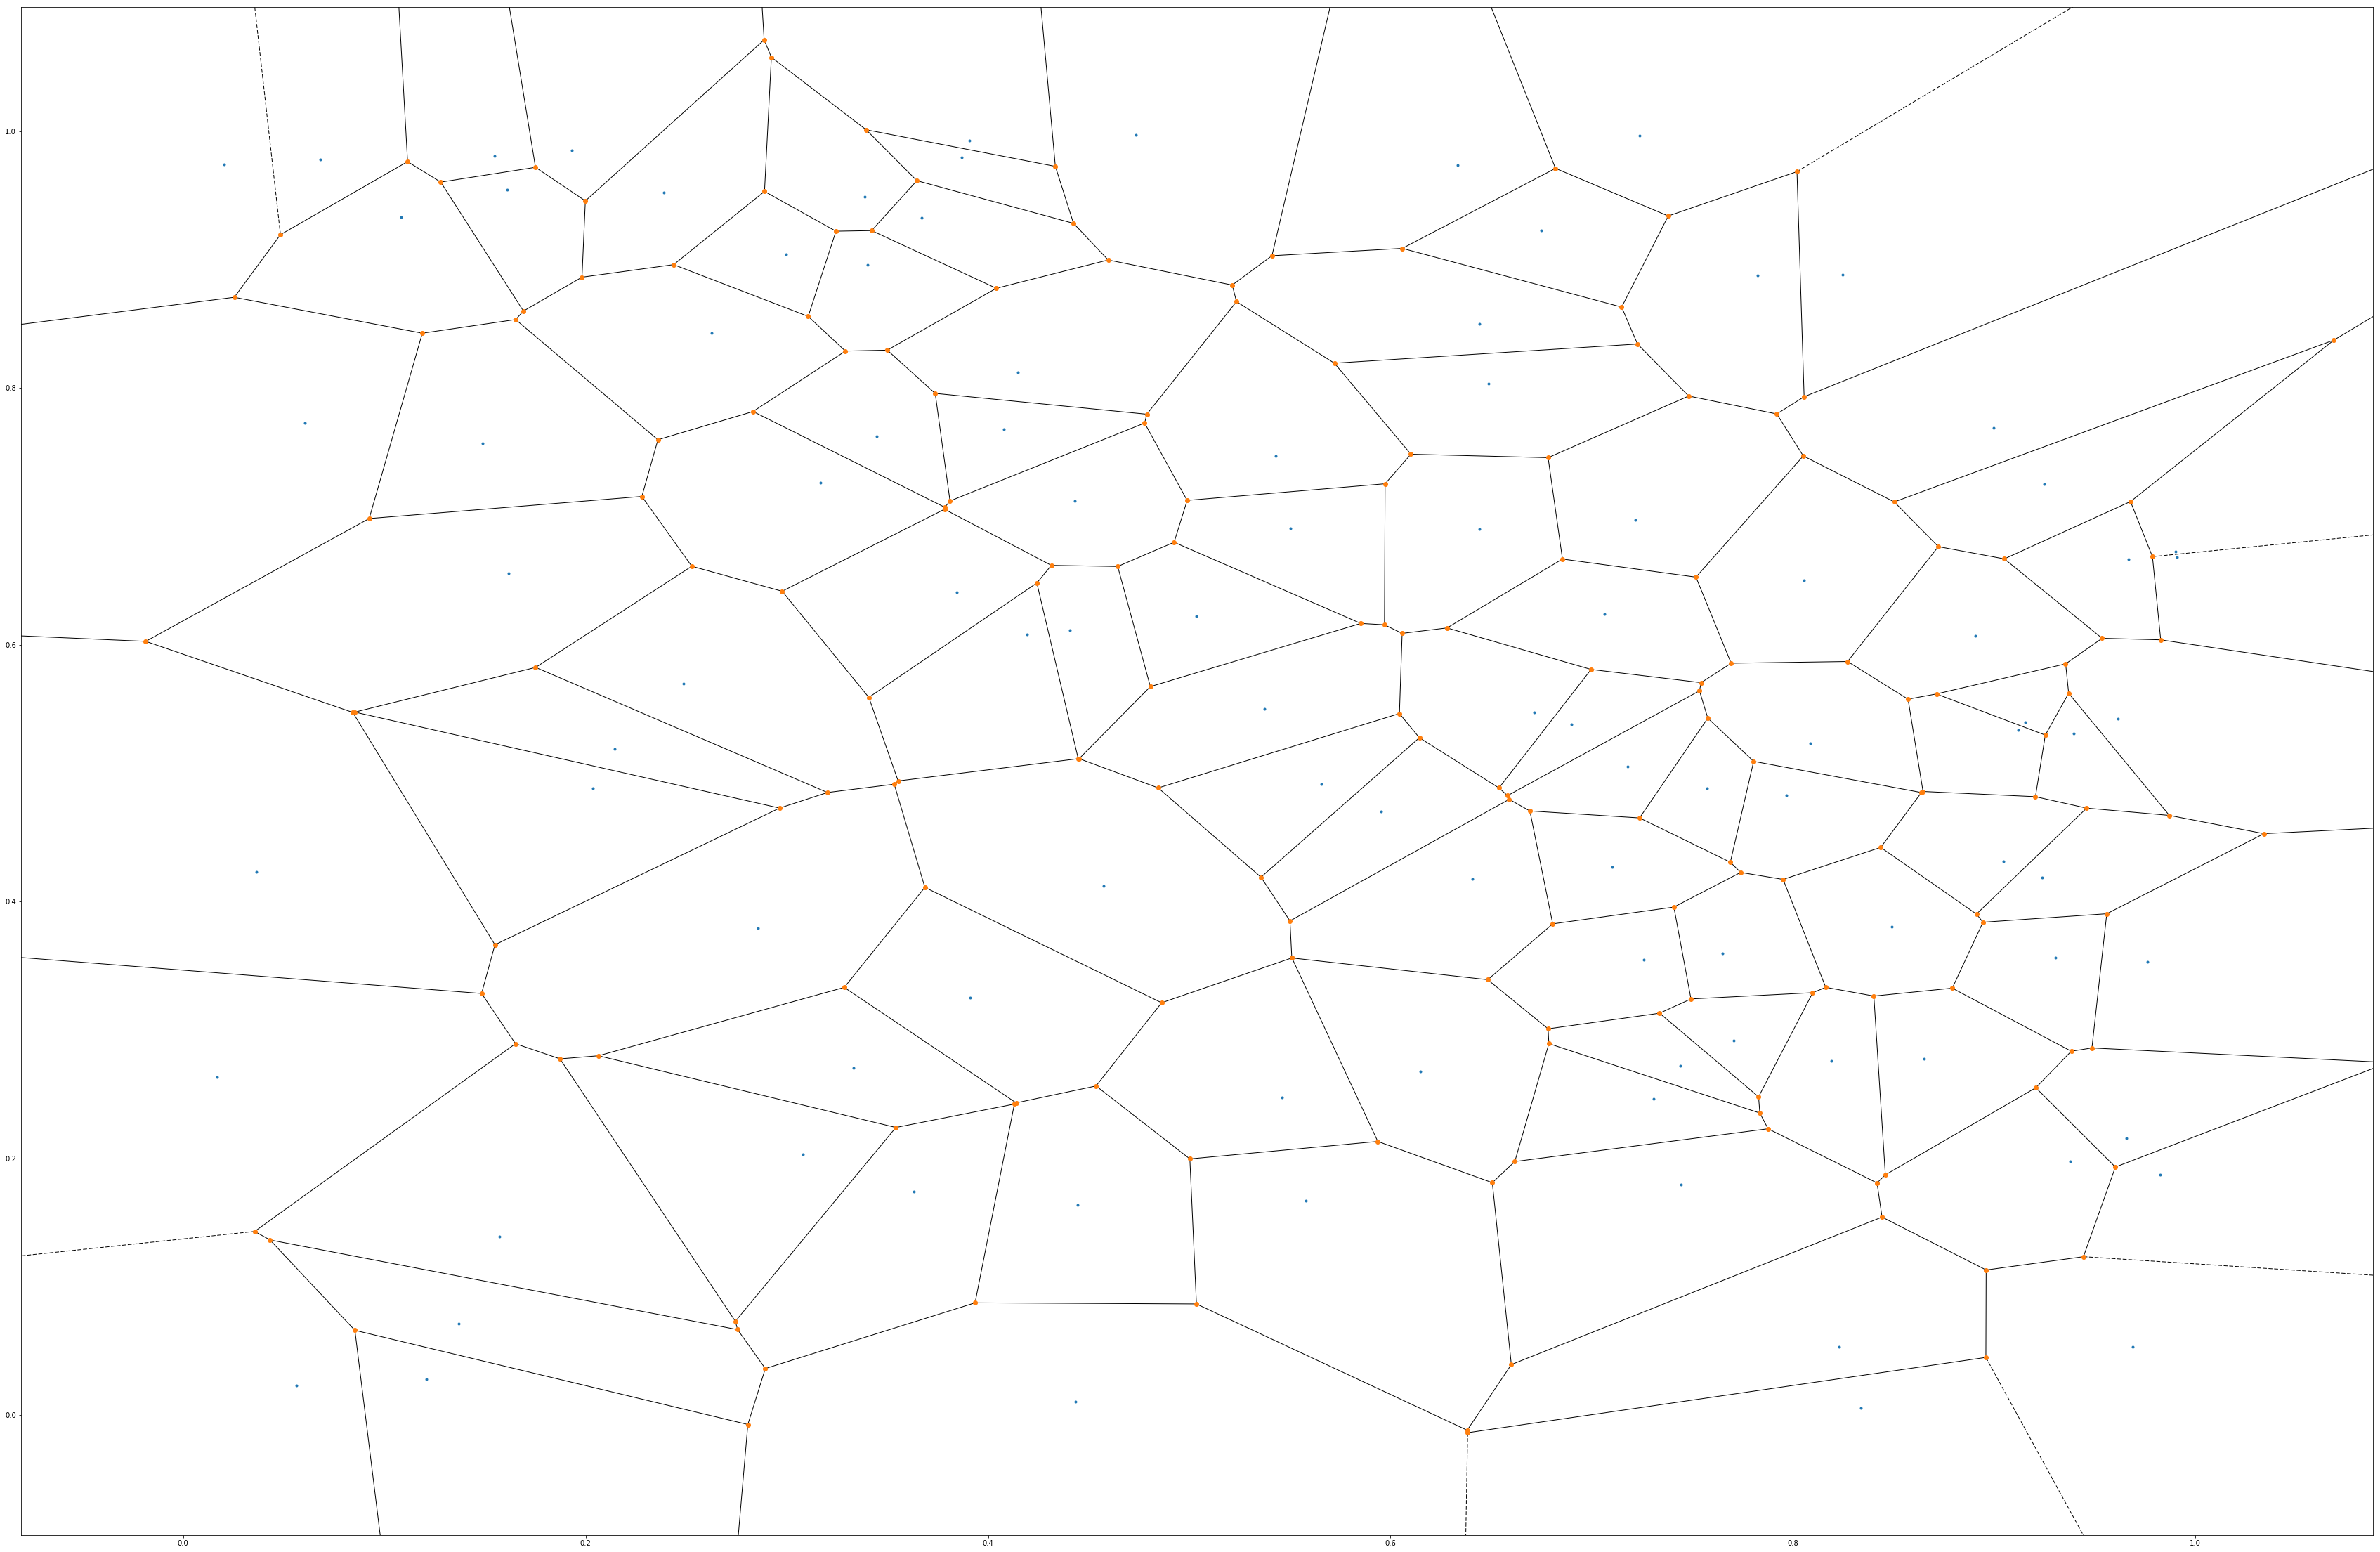

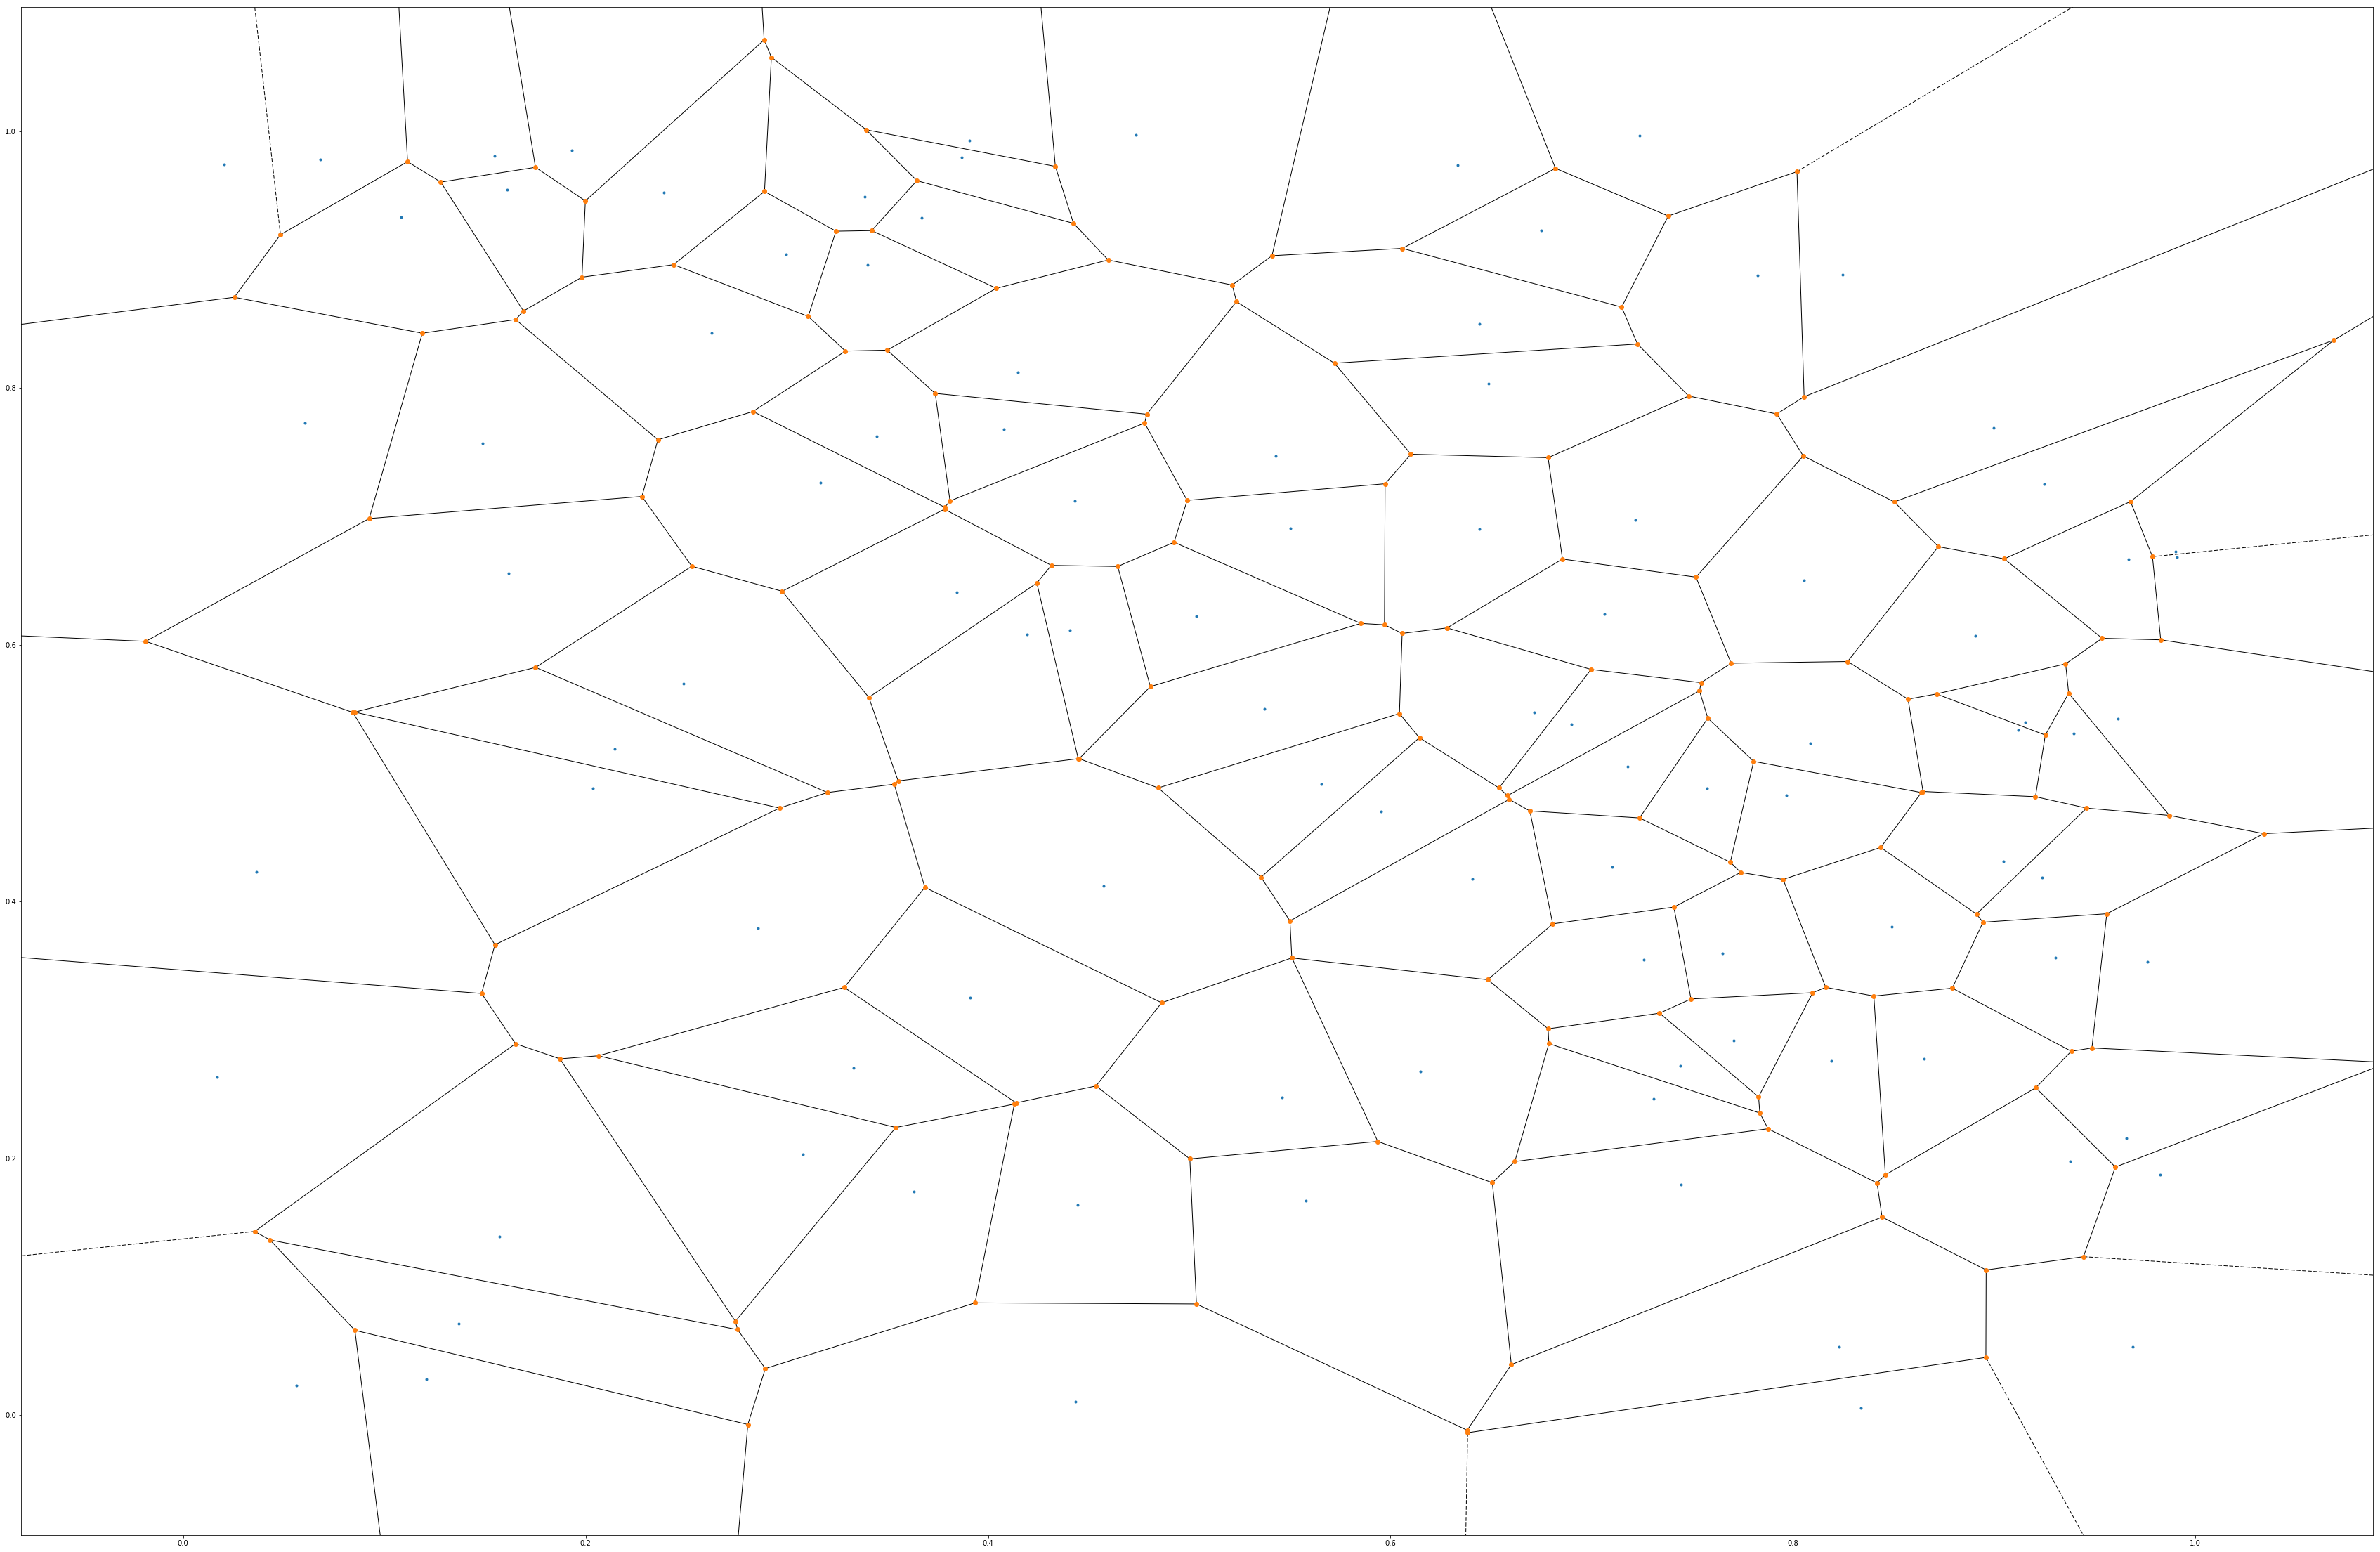

In [12]:
vor = Voronoi(points)
voronoi_plot_2d(vor)

In [6]:
### plot voronoi polygons for michigan tract centroids
# read in shapefile

tracts = gp.read_file('tl_2016_26_tract/tl_2016_26_tract.shp')

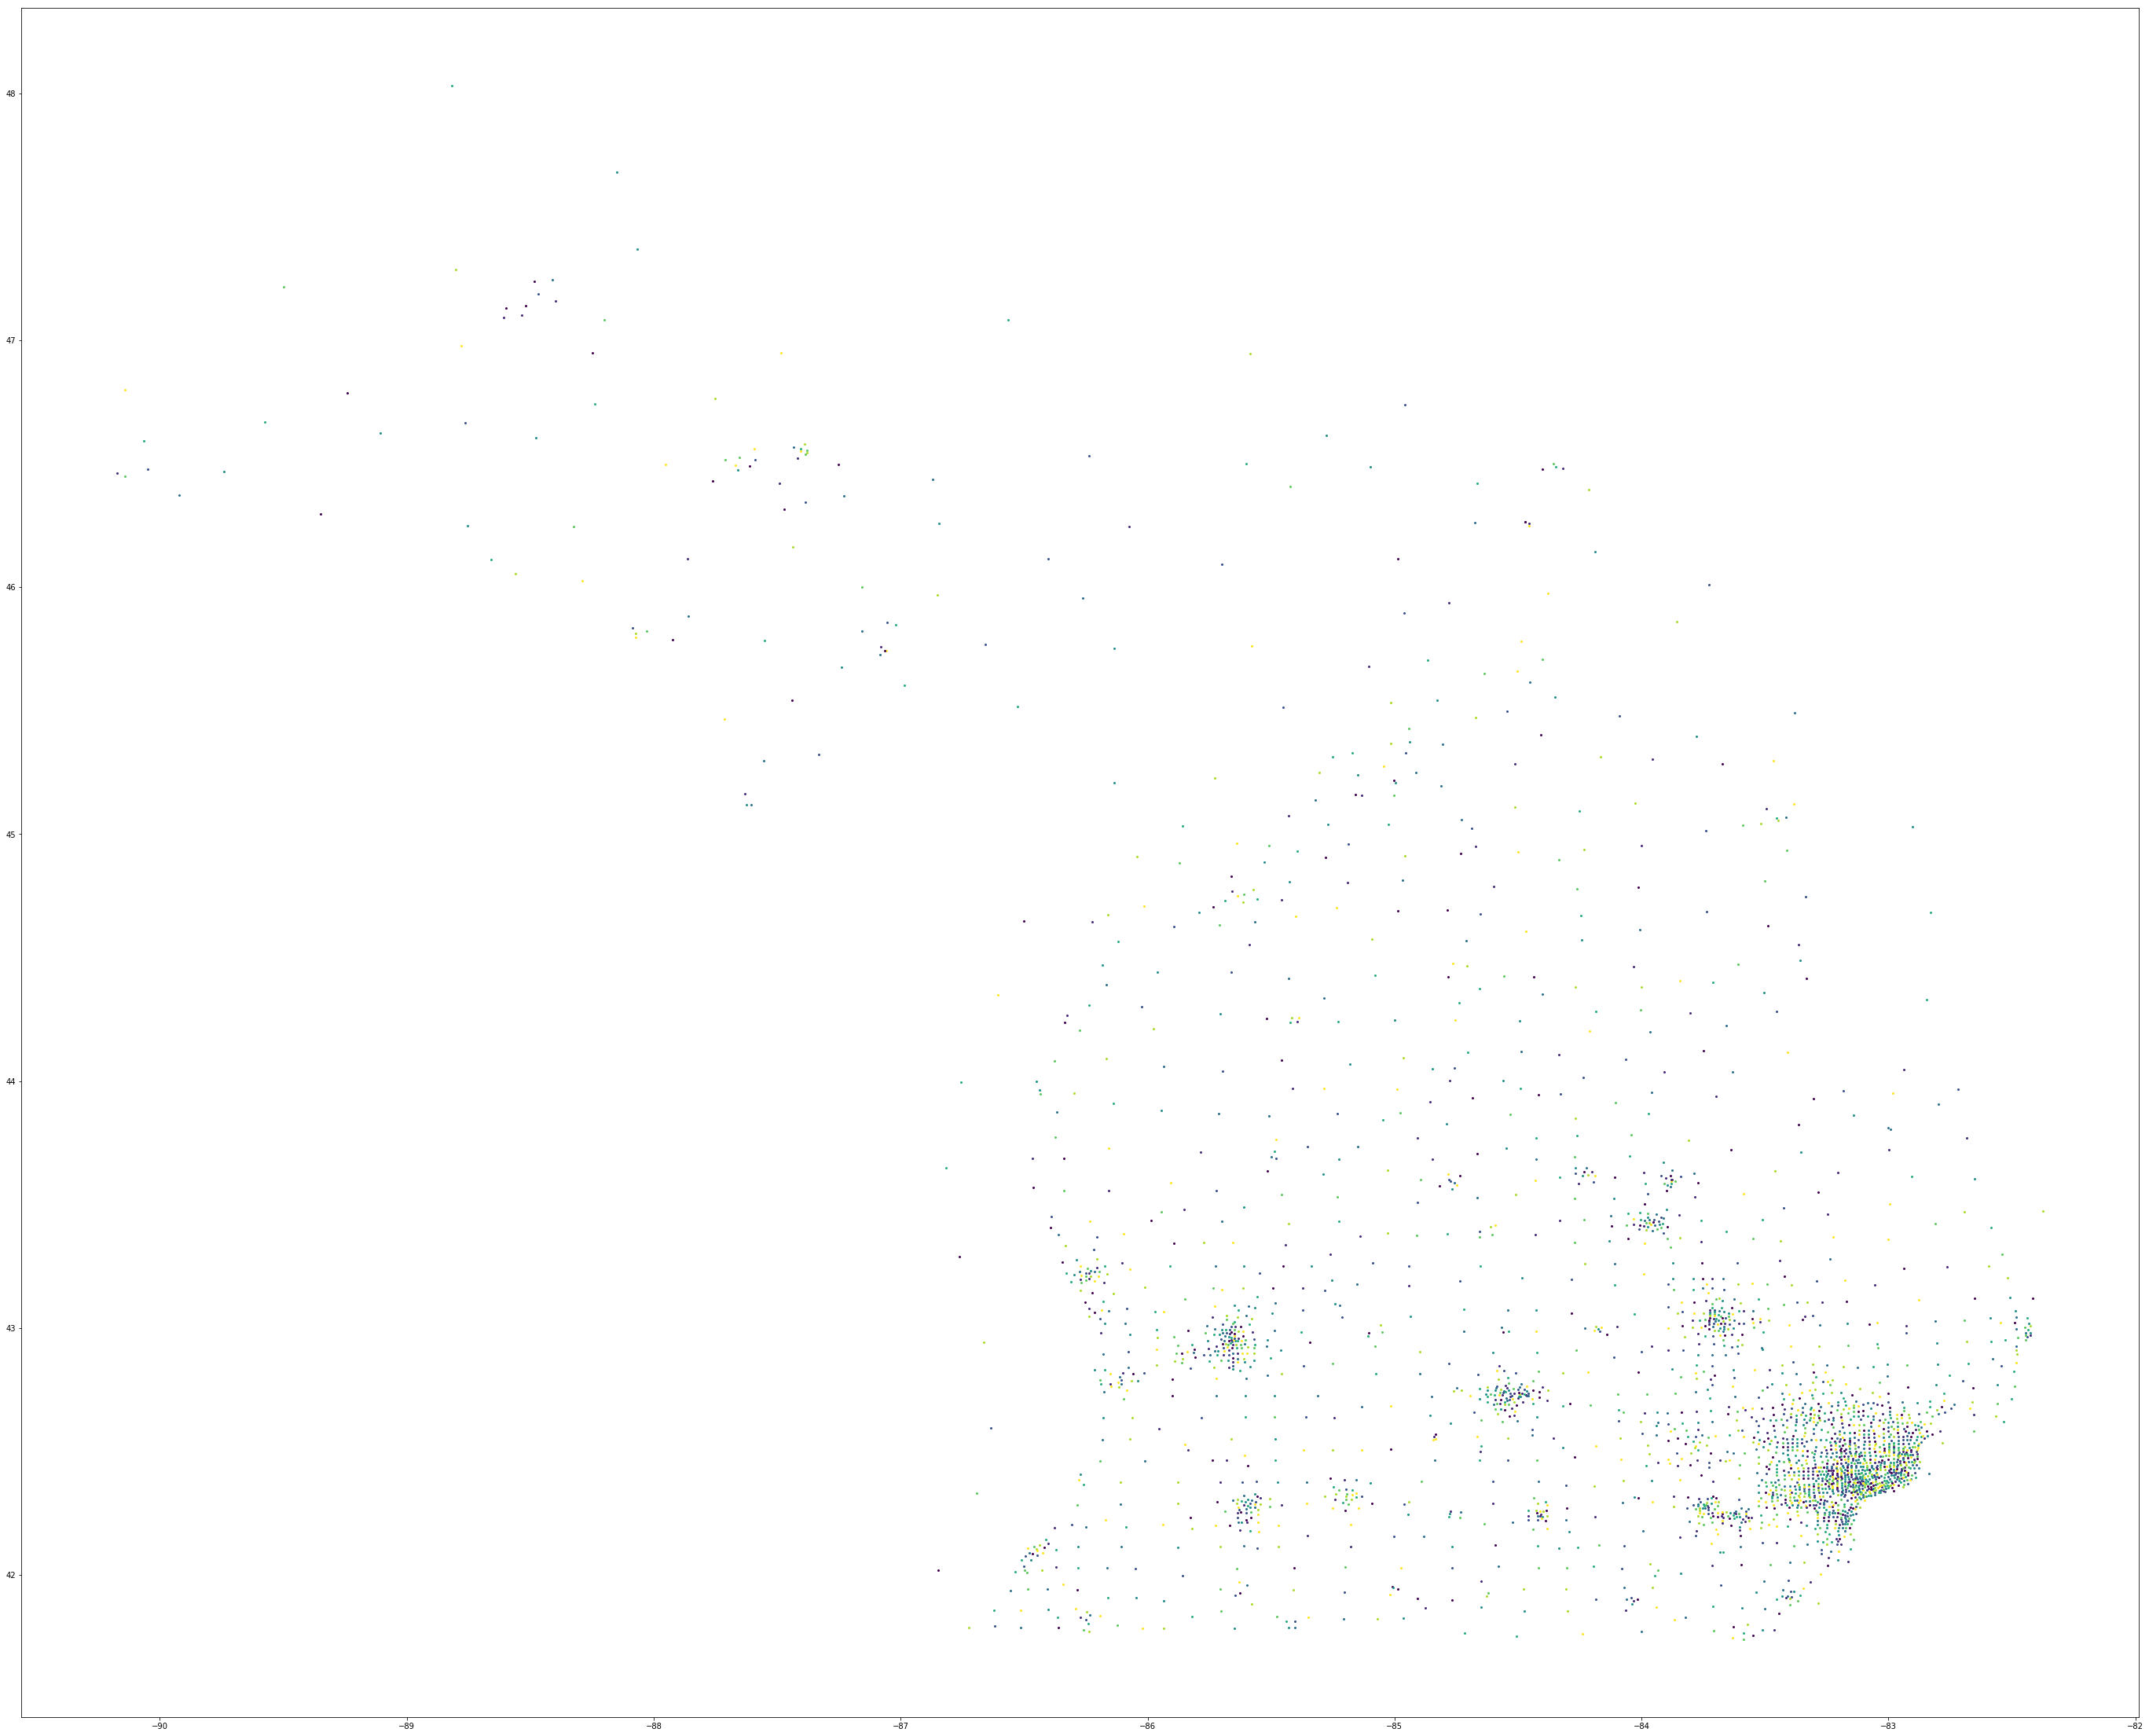

In [8]:
tracts['geometry'] = tracts.geometry.centroid
plt.rcParams["figure.figsize"] = (60,40)
tracts.plot()

In [9]:
# convert lat/longs to np array
tract_coordinates = np.empty([len(tracts), 2])
for i in range(len(tracts)):
    tract_coordinates[i] = [tracts.geometry[i].x, tracts.geometry[i].y]

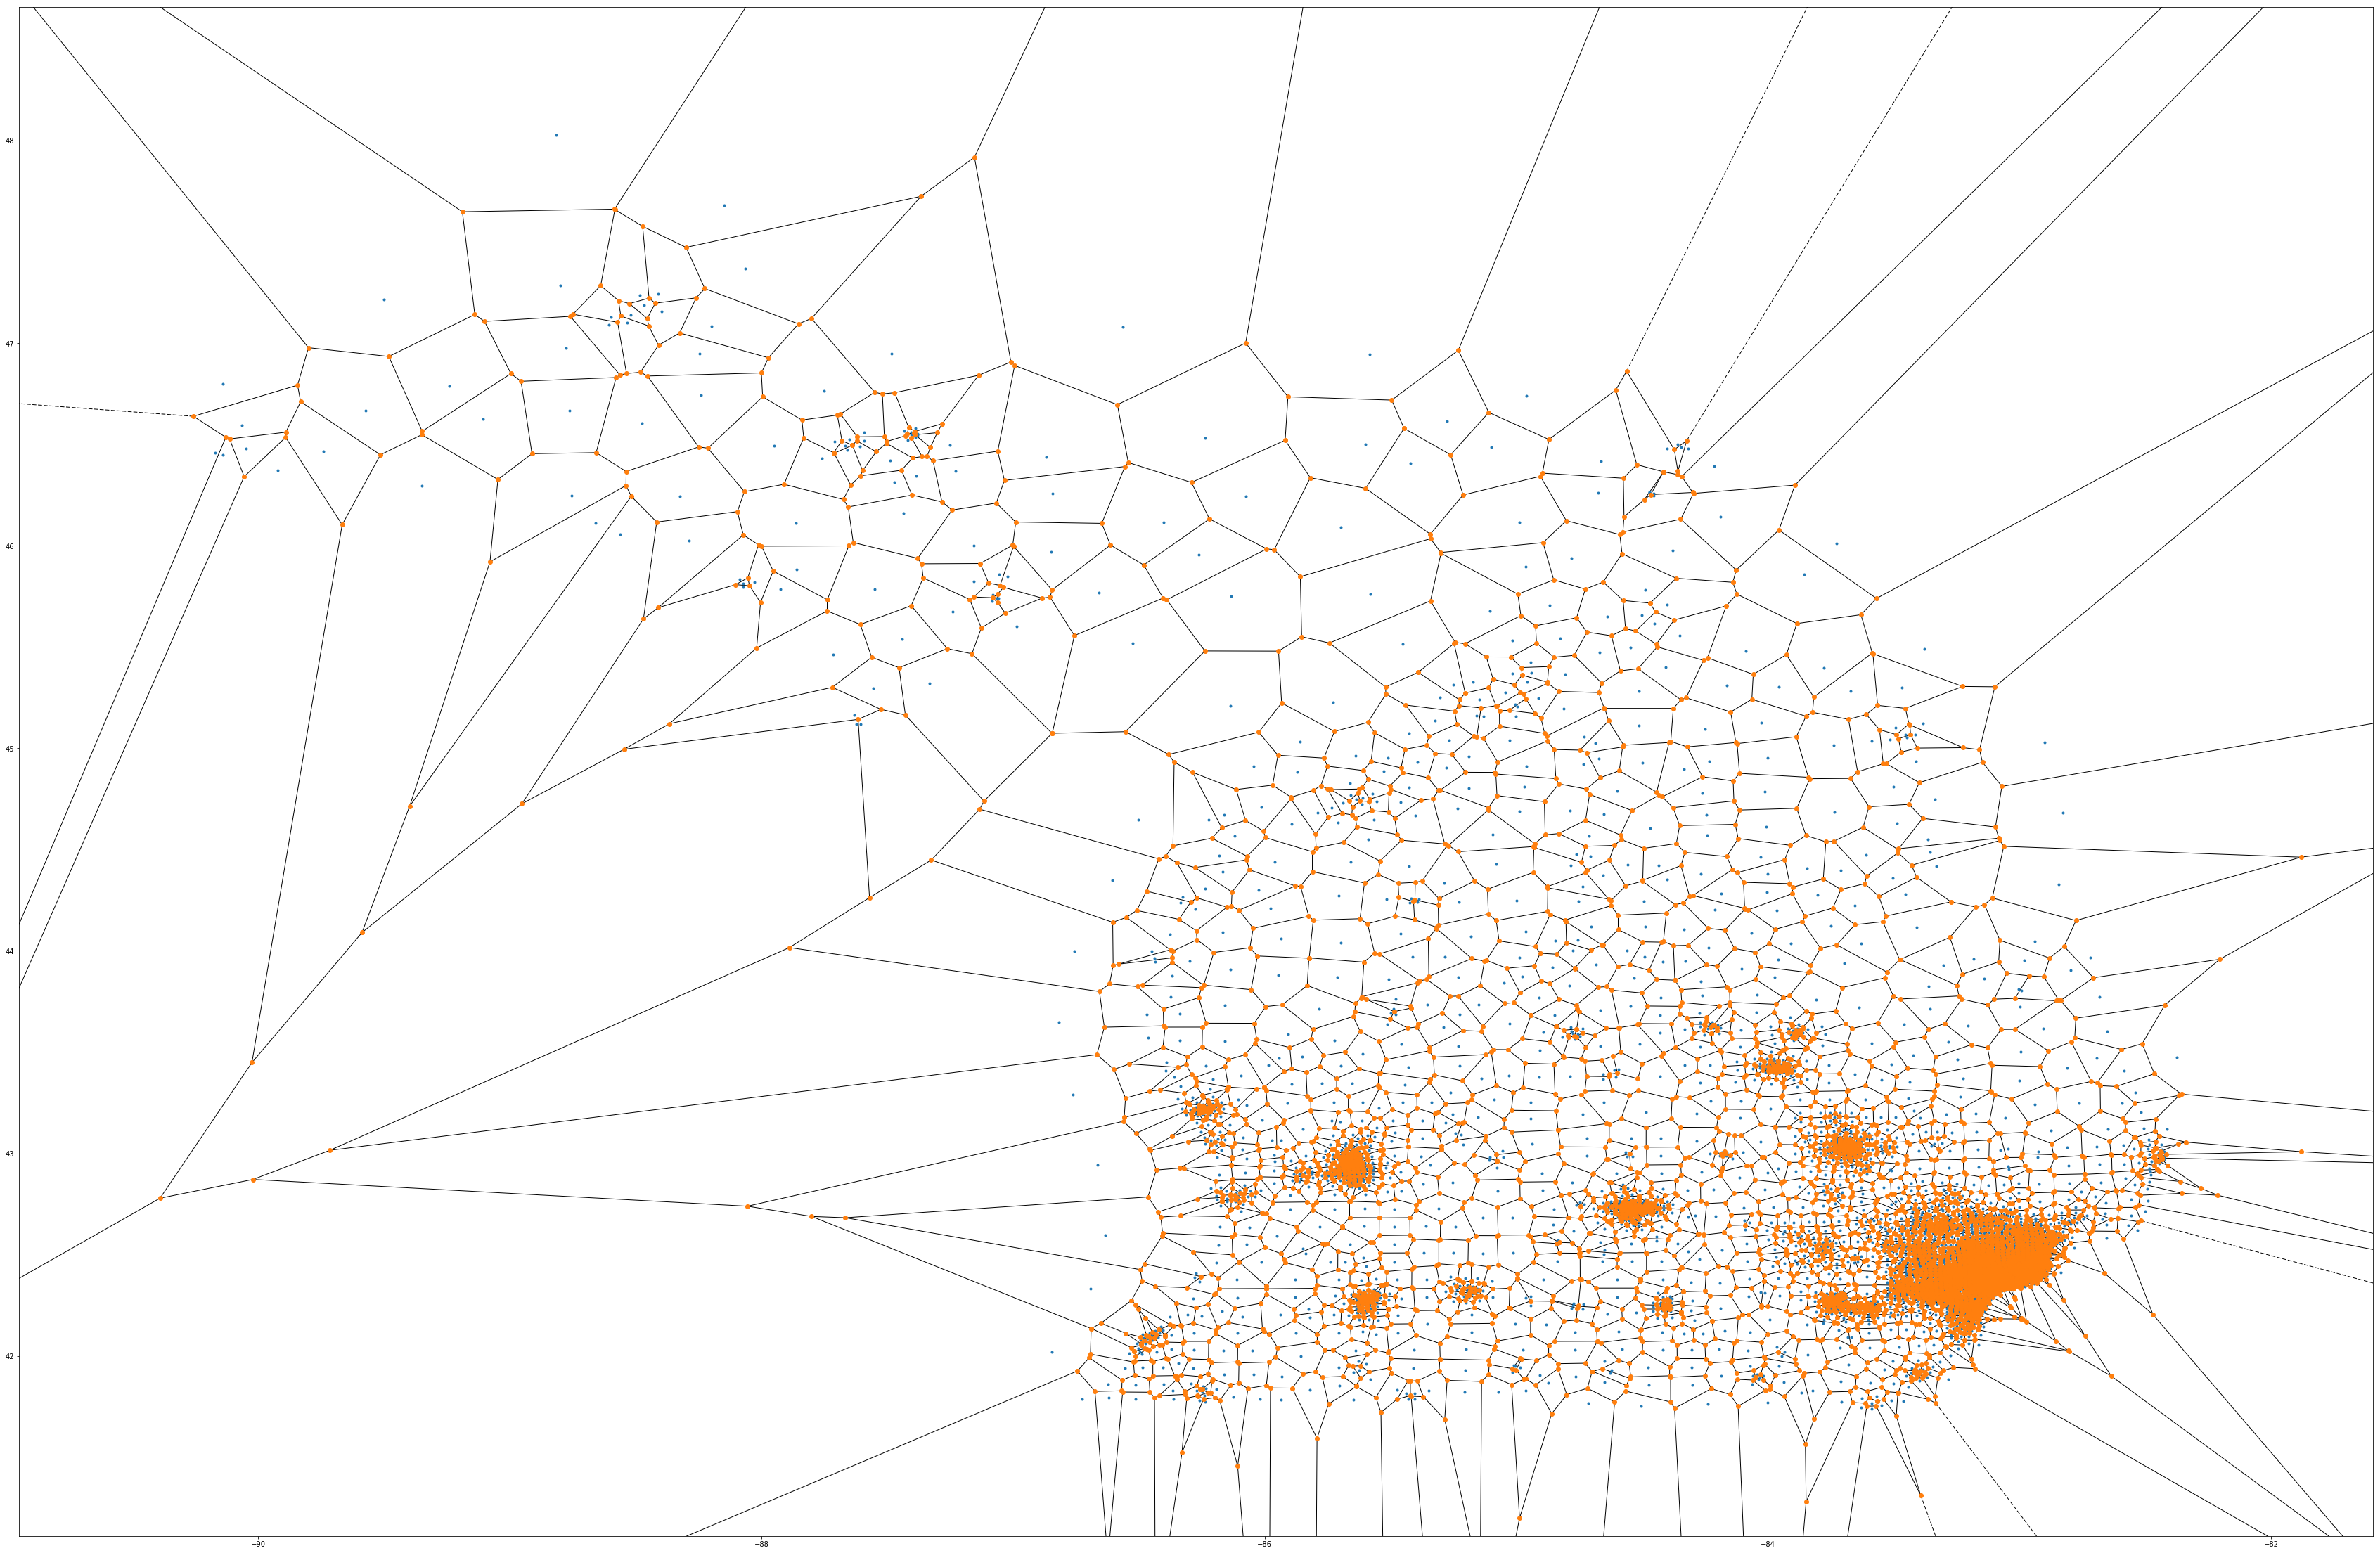

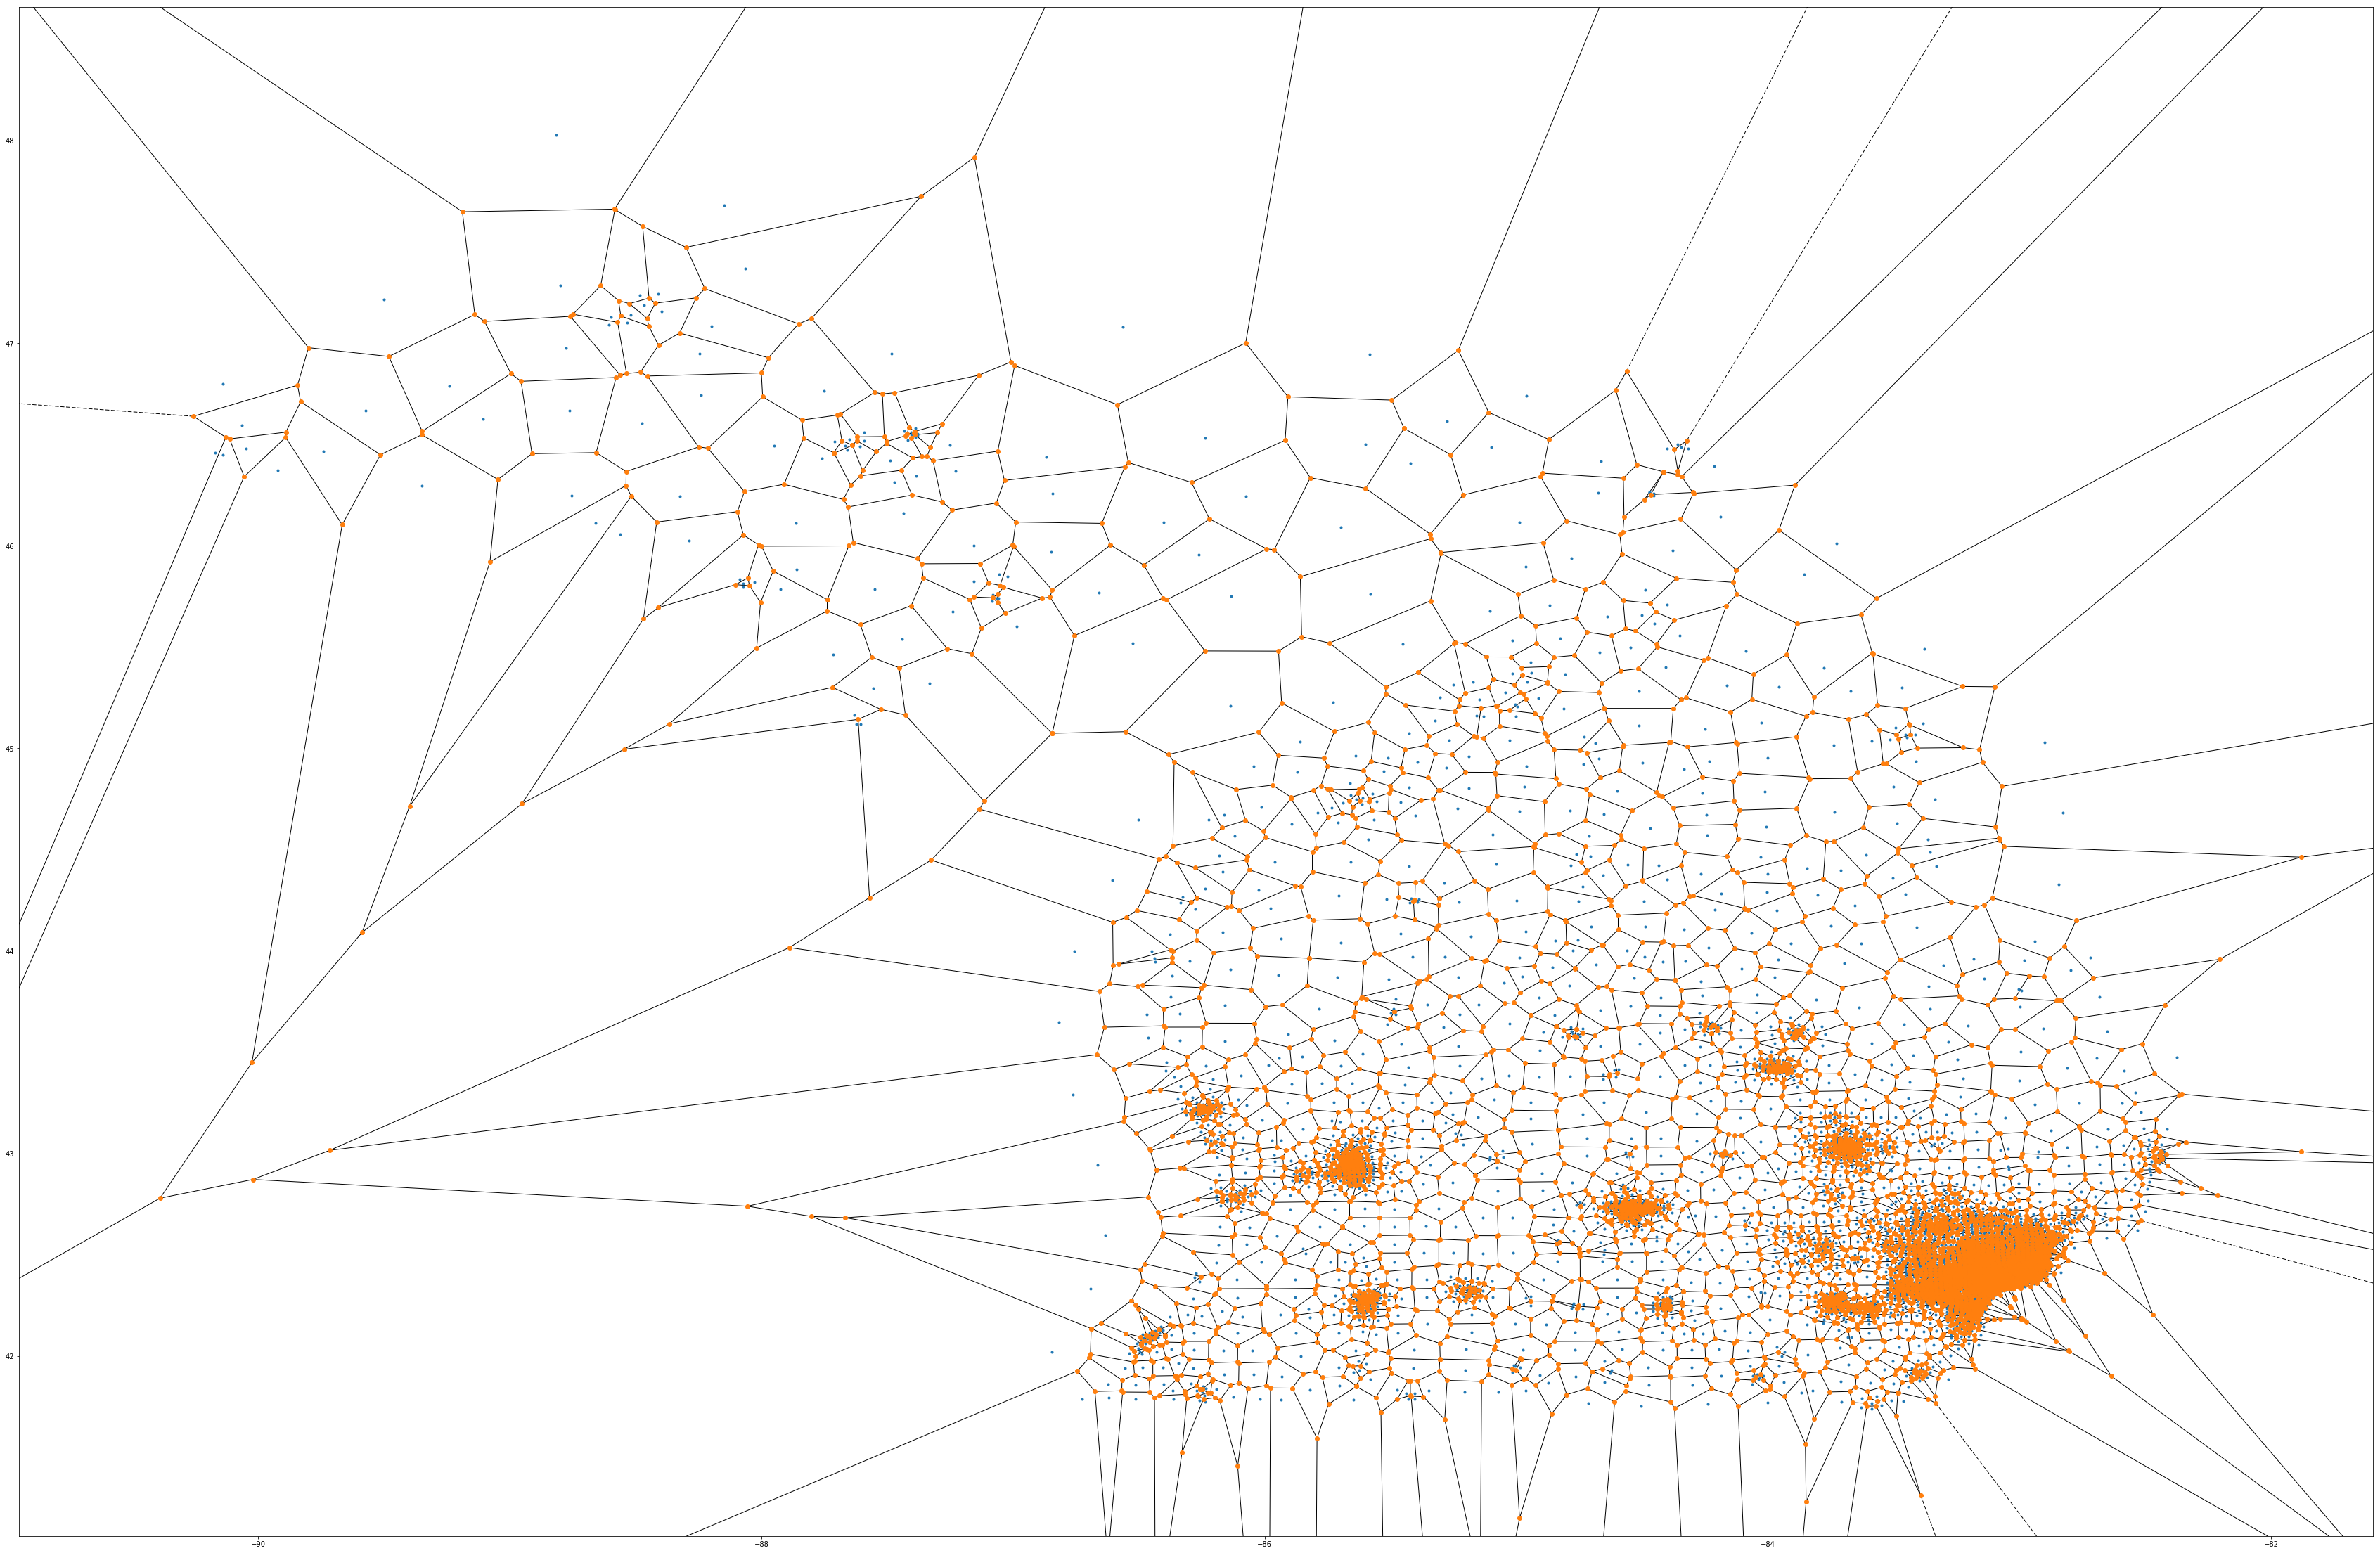

In [10]:
vor = Voronoi(tract_coordinates)
voronoi_plot_2d(vor)